# Autoregression Models (AR) for Time Series Forecasting
[https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
plt.style.use('bmh')

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


<Axes: xlabel='Date'>

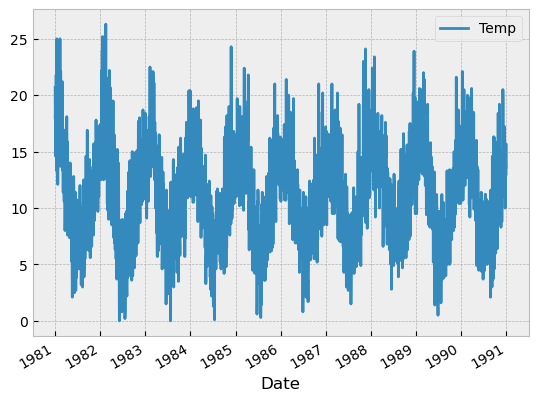

In [79]:
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.index = pd.to_datetime(series.index)
print(series.head())
series.plot()

## Quick Check for Autocorrelation

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

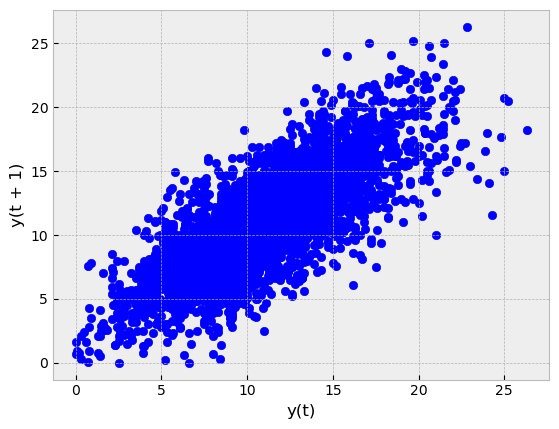

In [80]:
pd.plotting.lag_plot(series)

In [81]:
series.shift(1)

,Temp
Date,
1981-01-01,NaN
1981-01-02,20.7
1981-01-03,17.9
1981-01-04,18.8
1981-01-05,14.6
...,...
1990-12-27,14.6
1990-12-28,14.0
1990-12-29,13.6


<Axes: xlabel='Temp_t'>

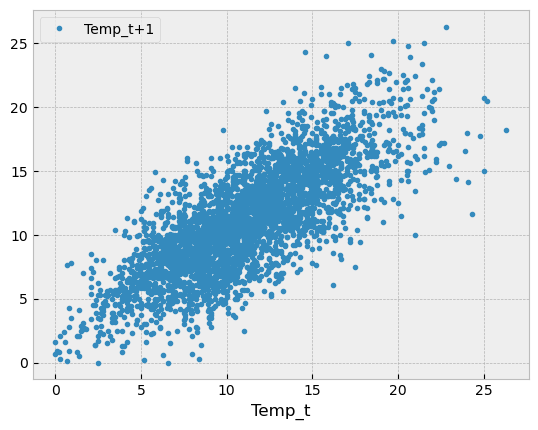

In [82]:
df_shift = pd.merge(left=series.shift(-1), right=series, how='left', left_index=True, right_index=True, suffixes=('_t+1','_t'))
fig,ax=plt.subplots()
df_shift.plot(x='Temp_t', y='Temp_t+1', style='.', ax=ax)

In [83]:
df_shift.dropna().corr()

,Temp_t+1,Temp_t
Temp_t+1,1.00000,0.77487
Temp_t,0.77487,1.00000


In [84]:
lags = np.arange(0,30)
df_shift=pd.DataFrame()
for lag in lags:
    df_shift[lag] = series['Temp'].shift(-lag)

In [85]:
df_shift

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,...,18.2,12.1,14.4,16.0,16.5,18.7,19.4,17.2,15.5,15.1
1981-01-02,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,...,12.1,14.4,16.0,16.5,18.7,19.4,17.2,15.5,15.1,15.4
1981-01-03,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,...,14.4,16.0,16.5,18.7,19.4,17.2,15.5,15.1,15.4,15.3
1981-01-04,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,...,16.0,16.5,18.7,19.4,17.2,15.5,15.1,15.4,15.3,18.8
1981-01-05,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,...,16.5,18.7,19.4,17.2,15.5,15.1,15.4,15.3,18.8,21.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,13.6,13.5,15.7,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-28,13.6,13.5,15.7,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-29,13.5,15.7,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
corrs = np.ndarray(len(lags))
for i,lag in enumerate(lags):
    corrs[i] = df_shift[[0,lag]].dropna().corr().values[0,1]

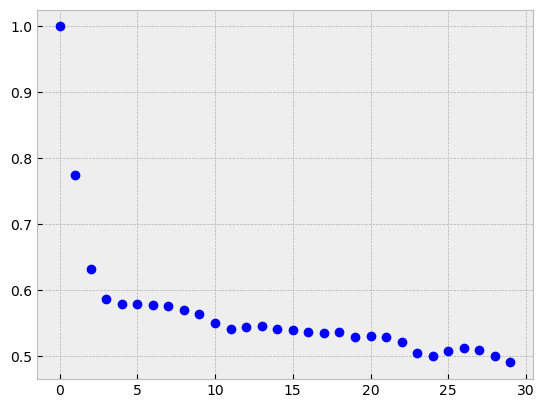

In [87]:
fig,ax=plt.subplots()
ax.plot(lags, corrs,'bo')

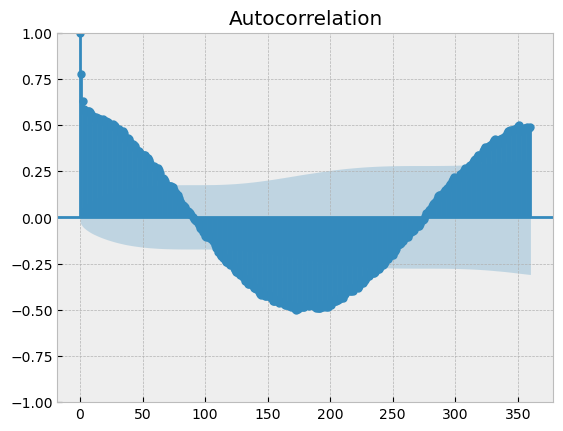

In [115]:
plot_acf(series, lags=360);

## Persistence Model

## Autoregression Model

In [116]:
data = series.copy()
X = data['Temp']
i = 360
X_train = X.iloc[0:-i]
X_test = X.iloc[-i:]

In [117]:
X_train

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
Name: Temp, Length: 3290, dtype: float64

In [118]:
X_test

Date
1990-01-06    15.3
1990-01-07    16.4
1990-01-08    14.8
1990-01-09    17.4
1990-01-10    18.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 360, dtype: float64

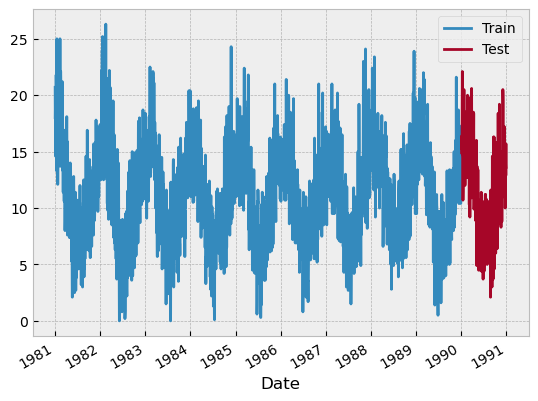

In [119]:
fig,ax=plt.subplots()
X_train.plot(ax=ax, label='Train')
X_test.plot(ax=ax, label='Test')
ax.legend()

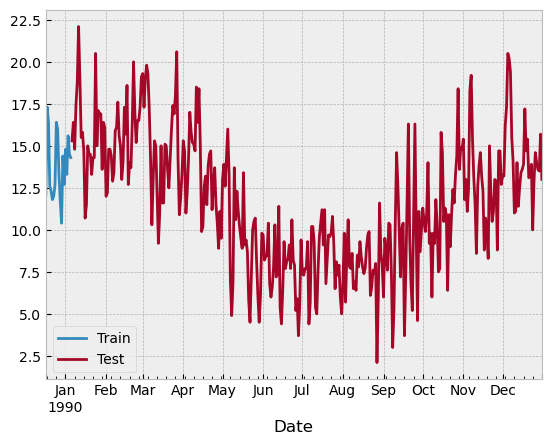

In [120]:
fig,ax=plt.subplots()
X_train.iloc[-20:].plot(ax=ax, label='Train')
X_test.plot(ax=ax, label='Test')
ax.legend()

In [143]:
model = AutoReg(X_train, lags=180)

[05/12/23 15:28:27] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=769011;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=272690;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/base/tsa_model.py:471: ValueWarning: A date index has been                        
                             provided, but it has no associated frequency information and so will                  
                             be ignored when e.g. forecasting.                                                     
                               self._init_dates(dates, freq)                                                       
                                                                                                                   

In [144]:
model_fit = model.fit()

In [145]:
model_fit.params

const        3.303627
Temp.L1      0.554649
Temp.L2     -0.098440
Temp.L3      0.038605
Temp.L4      0.010932
               ...   
Temp.L176   -0.000094
Temp.L177   -0.010452
Temp.L178    0.006618
Temp.L179   -0.023224
Temp.L180    0.044253
Length: 181, dtype: float64

In [148]:
predictions = model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)
predictions.index = X_test.index

[05/12/23 15:28:33] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=98541;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=355931;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/base/tsa_model.py:834: ValueWarning: No supported index is                        
                             available. Prediction results will be given with an integer index                     
                             beginning at `start`.                                                                 
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=733223;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=408948;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/base/tsa_model.py:834: DeprecationWarning: No supported index is                  
                             available. In the next version, calling this method in a model without                
                             a supported index will result in an exception.                                        
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=140873;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=115143;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/deterministic.py:302: UserWarning: Only PeriodIndexes,                            
                             DatetimeIndexes with a frequency set, RangesIndexes, and Index with a                 
                             unit increment support extending. The index is set will contain the                   
                             position relative to the data length.                                                 
                               fcast_index = self._extend_index(index, steps, forecast_index)                      
                                                                                                                   

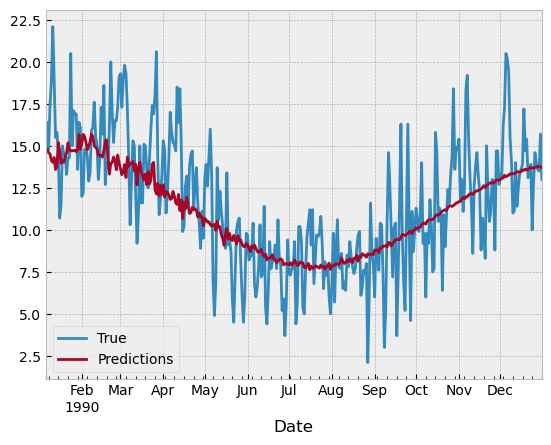

In [149]:
fig,ax=plt.subplots()
X_test.plot(ax=ax, label='True')
predictions.plot(ax=ax, label='Predictions')
ax.legend()

[05/12/23 15:28:40] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=978544;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=423850;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/base/tsa_model.py:834: ValueWarning: No supported index is                        
                             available. Prediction results will be given with an integer index                     
                             beginning at `start`.                                                                 
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=485837;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=381439;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/base/tsa_model.py:834: DeprecationWarning: No supported index is                  
                             available. In the next version, calling this method in a model without                
                             a supported index will result in an exception.                                        
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=962066;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=833695;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/deterministic.py:302: UserWarning: Only PeriodIndexes,                            
                             DatetimeIndexes with a frequency set, RangesIndexes, and Index with a                 
                             unit increment support extending. The index is set will contain the                   
                             position relative to the data length.                                                 
                               fcast_index = self._extend_index(index, steps, forecast_index)                      
                                                                                                                   

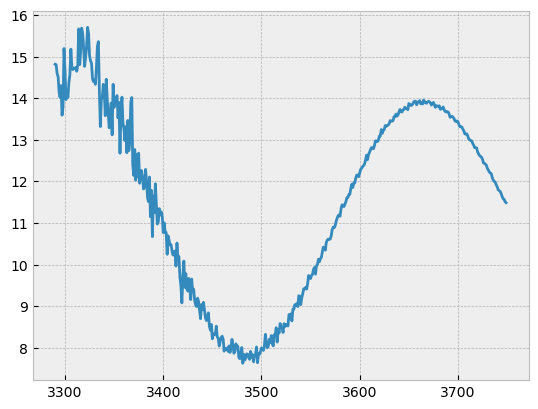

In [150]:
fig,ax=plt.subplots()
ax.plot(model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1+100, dynamic=False))

In [257]:
model_autoreg = AutoReg(X_train, lags=10)
model_fit_autoreg = model_autoreg.fit()
model_fit_autoreg.params

[05/12/23 16:03:46] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=140084;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=908761;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/base/tsa_model.py:471: ValueWarning: A date index has been                        
                             provided, but it has no associated frequency information and so will                  
                             be ignored when e.g. forecasting.                                                     
                               self._init_dates(dates, freq)                                                       
                                                                                                                   

const       0.933973
Temp.L1     0.607351
Temp.L2    -0.078844
Temp.L3     0.066594
Temp.L4     0.044980
Temp.L5     0.054050
Temp.L6     0.043507
Temp.L7     0.058244
Temp.L8     0.035486
Temp.L9     0.045188
Temp.L10    0.039037
dtype: float64

In [292]:
lags = 10
i = len(X_train) - lags + 1 - 1
rollings = np.ndarray((i,lags))
for n in range(0,i):
    rollings[n,:] = np.flipud(X_train.iloc[n:n+lags].values)

columns = [f"L{n}" for n in range(1,lags+1)]
rollings = pd.DataFrame(rollings, columns=columns)
rollings['const'] = 1
rollings.index = X_train.index[lags:]

In [293]:
rollings

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,const
Date,,,,,,,,,,,
1981-01-11,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7,1
1981-01-12,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,1
1981-01-13,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,1
1981-01-14,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,1
1981-01-15,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,1
...,...,...,...,...,...,...,...,...,...,...,...
1990-01-01,12.7,14.4,10.4,11.7,13.3,16.0,16.4,12.7,12.0,11.8,1
1990-01-02,14.8,12.7,14.4,10.4,11.7,13.3,16.0,16.4,12.7,12.0,1
1990-01-03,13.3,14.8,12.7,14.4,10.4,11.7,13.3,16.0,16.4,12.7,1


In [294]:
rollings.shape

(3280, 11)

In [295]:
len(X_train)

3290

In [296]:
X_train.iloc[lags:]

Date
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
              ... 
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
Name: Temp, Length: 3280, dtype: float64

In [297]:
X_train.iloc[-lags:]

Date
1989-12-27    13.3
1989-12-28    11.7
1989-12-29    10.4
1989-12-30    14.4
1989-12-31    12.7
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
Name: Temp, dtype: float64

In [298]:
y = X_train.iloc[lags:]

In [299]:
rollings

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,const
Date,,,,,,,,,,,
1981-01-11,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7,1
1981-01-12,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,1
1981-01-13,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,1
1981-01-14,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,1
1981-01-15,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,1
...,...,...,...,...,...,...,...,...,...,...,...
1990-01-01,12.7,14.4,10.4,11.7,13.3,16.0,16.4,12.7,12.0,11.8,1
1990-01-02,14.8,12.7,14.4,10.4,11.7,13.3,16.0,16.4,12.7,12.0,1
1990-01-03,13.3,14.8,12.7,14.4,10.4,11.7,13.3,16.0,16.4,12.7,1


In [300]:
y

Date
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
              ... 
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
Name: Temp, Length: 3280, dtype: float64

In [301]:

model = sm.OLS(y, rollings, hasconst=False)

In [302]:
result = model.fit()

In [303]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Temp   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              6695.
Date:                Fri, 12 May 2023   Prob (F-statistic):                        0.00
Time:                        16:08:59   Log-Likelihood:                         -7579.0
No. Observations:                3280   AIC:                                  1.518e+04
Df Residuals:                    3269   BIC:                                  1.525e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L1             0.6074      0.017     34.752      0.000       0.573       0.642
L2            -0.0788      0.020     -3.859      0.000      -0.119      -0.039
L3             0.0666      0.020      3.254      0.001       0.026       0.107
L4             0.0450      0.020      2.197      0.028       0.005       0.085
L5             0.0541      0.020      2.639      0.008       0.014       0.094
L6             0.0435      0.020      2.124      0.034       0.003       0.084
L7             0.0582      0.020      2.844      0.004       0.018       0.098
L8             0.0355      0.020      1.733      0.083      -0.005       0.076
L9             0.0452      0.020      2.211      0.027       0.005       0.085
L10            0.0390      0.017      2.236      0.025       0.005       0.073
const          0.9340      0.149      6.269      0.000       0.642       1.226
==============================================================================
Omnibus:                       11.176   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.269
Skew:                           0.063   Prob(JB):                      0.00131
Kurtosis:                       3.285   Cond. No.                         128.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
model_fit_autoreg.params

const       0.933973
Temp.L1     0.607351
Temp.L2    -0.078844
Temp.L3     0.066594
Temp.L4     0.044980
Temp.L5     0.054050
Temp.L6     0.043507
Temp.L7     0.058244
Temp.L8     0.035486
Temp.L9     0.045188
Temp.L10    0.039037
dtype: float64

<Axes: xlabel='Date'>

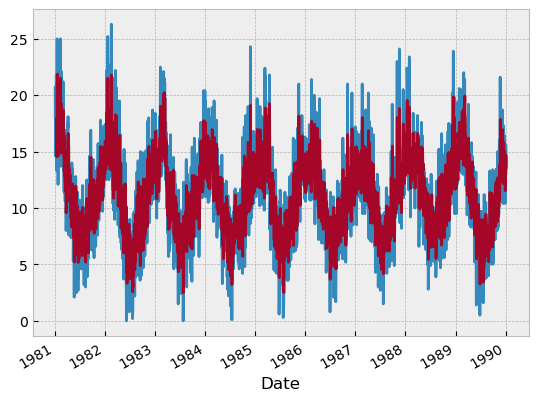

In [305]:
fig,ax=plt.subplots()
X_train.plot(ax=ax)
result.predict(rollings).plot(ax=ax)

In [306]:
result.params

L1       0.607351
L2      -0.078844
L3       0.066594
L4       0.044980
L5       0.054050
L6       0.043507
L7       0.058244
L8       0.035486
L9       0.045188
L10      0.039037
const    0.933973
dtype: float64

In [340]:
y = list(X_train.iloc[-lags:].values)
y_pred = []
for n in range(30):
    x = np.concatenate((np.flipud(y[-lags:]),[result.params['const']]))
    y_pred_ = result.predict(x)
    y.append(float(y_pred_))
    y_pred.append(float(y_pred_))

In [341]:
y_pred2 = model_fit_autoreg.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)

[05/12/23 16:28:35] WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=656894;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=631295;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/base/tsa_model.py:834: ValueWarning: No supported index is                        
                             available. Prediction results will be given with an integer index                     
                             beginning at `start`.                                                                 
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=707792;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=253614;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/base/tsa_model.py:834: DeprecationWarning: No supported index is                  
                             available. In the next version, calling this method in a model without                
                             a supported index will result in an exception.                                        
                               return get_prediction_index(                                                        
                                                                                                                   

                    WARNING  /home/maa/anaconda3/envs/phd/lib/python3.10/site-packages/statsmodels/ ]8;id=654630;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=763538;file:///home/maa/anaconda3/envs/phd/lib/python3.10/warnings.py#109\109]8;;\
                             tsa/deterministic.py:302: UserWarning: Only PeriodIndexes,                            
                             DatetimeIndexes with a frequency set, RangesIndexes, and Index with a                 
                             unit increment support extending. The index is set will contain the                   
                             position relative to the data length.                                                 
                               fcast_index = self._extend_index(index, steps, forecast_index)                      
                                                                                                                   

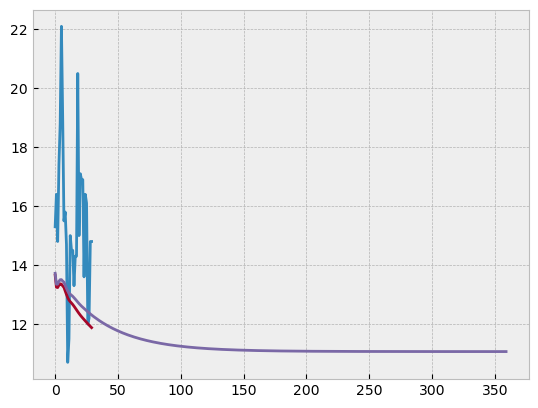

In [343]:
fig,ax=plt.subplots()
ax.plot(X_test.iloc[0:30].values)
ax.plot(y_pred)
ax.plot(y_pred2.values)